# Shimming of the OSI2 <b>V1</b> magnet

## with 4 shimming rings

# test of euler rotations

In [ ]:

#euler test
import numpy as np

r = np.asarray([0,0,1])
center = np.asarray([0,0,0])
r_centered = r-center
print(r_centered)

a = -90
b = 0
y = 0

from scipy.spatial.transform import Rotation

A = Rotation.from_euler('XYZ',[y, b, a], degrees=True)

rotation_matrix = A.as_matrix()
print(rotation_matrix)


#[190.64 149.49 202.24] -> [280.64        99.50677852 342.22322148]


r_centered_rotated = rotation_matrix@r_centered
r_centered_rotated_shifted = r_centered_rotated+center

print(r_centered_rotated_shifted)

# importing the map

In [5]:
# --- REALITY WAS: --- 
# one ring with fixed euler rotations, sim promises 2500 ppm
# 1. import the b0 map


import numpy as np  
import b0
b0map_init = b0.b0()
filename_to_import_csv_data_from = r'./data/V2p1_magnet/2024-09-23-16-30v_2p1_no_shims/240923_ball_R120_12pts_bvals.csv'

b0map_init.import_from_csv(filename_to_import_csv_data_from,eulers=[-90,0,0])
# volume from shell init
b0map_init.transfer_coordinates_of_the_path_from_cosi_to_magnet(filtering = 1.5,stepsize=243.65-233.22,onesign=True,component=1,magnet_center=[228.00, 224.45, 168.00])


No path object given on construction of b0 object.
 b0 instance initialized without path.
importing b0 object from csv file./data/V2p1_magnet/2024-09-23-16-30v_2p1_no_shims/240923_ball_R120_12pts_bvals.csv
No path object given on construction of b0 object.
 b0 instance initialized without path.
warning. path file  /,,,,,,
 not used. path data taken from csv!
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
importing path from a csv file
ROTATING THE PATH NOW!
path center set to:  [ 0.00810591 -0.00018212  0.0042701 ]
ROTATING THE MAGNET NOW!
len(path.r)= 7138
len(b0Data)= 7138
-147.0717119641356  < x <  123.40828803586439
-113.64207621182403  < y <  115.92792378817597
-133.15  < z <  195.64000000000001
[10.439999999999998, 10.429999999999993, 10.439999999999998, 10.430000000000007, 10.439999999999998, 10.430000000000007, 10.439999999999984, 10.430000000000007, 10.439999999999998, 10.430000000000007, 10.439999999999998, 10.430000000000007, 10.439999999999998, 10.430000000000007, 10.4

c:\cosi-measure\Software\COSI2\b0.py:323: RuntimeWarning: divide by zero encountered in scalar divide
  if abs(meanField_raw)/abs(self.fieldDataAlongPath[idx,component])>filtering:


[[nan nan nan nan]]
mean:  42.64532782291959
ratio pt/mean:  0.04197411747971065
-1.79 is too low! assigning NAN
assigned:  [nan nan nan nan] <-----
[[nan nan nan nan]]
mean:  42.64532782291959
ratio pt/mean:  0.042208609756133615
-1.8 is too low! assigning NAN
assigned:  [nan nan nan nan] <-----
[[nan nan nan nan]]
mean:  42.64532782291959
ratio pt/mean:  0.042912086585402506
-1.83 is too low! assigning NAN
assigned:  [nan nan nan nan] <-----
[[nan nan nan nan]]
mean:  42.64532782291959
ratio pt/mean:  0.043615563414671404
-1.86 is too low! assigning NAN
assigned:  [nan nan nan nan] <-----
[[nan nan nan nan]]
mean:  42.64532782291959
ratio pt/mean:  0.04431904024394029
-1.89 is too low! assigning NAN
assigned:  [nan nan nan nan] <-----
[[nan nan nan nan]]
mean:  42.64532782291959
ratio pt/mean:  0.04455353252036325
-1.9 is too low! assigning NAN
assigned:  [nan nan nan nan] <-----
[[nan nan nan nan]]
mean:  42.64532782291959
ratio pt/mean:  0.04478802479678622
-1.91 is too low! assign

In [6]:
print(b0map_init.fieldDataAlongPath[5000])

[  3.549      -48.299        1.413       48.44982323]


# Plotting the initial field

-113.64207621182403
115.81792378817612
mean, mT:  -48.26206973388908
low, mT: -49.403 
high, mT: -47.037


<Figure size 640x480 with 0 Axes>

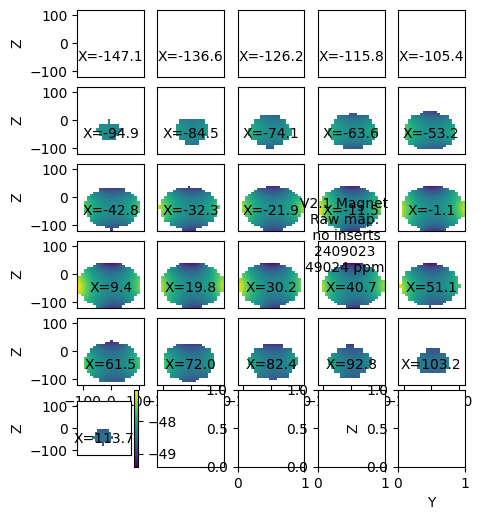

In [10]:

# initial field (RAW)
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals_raw = b0map_init.xPts
y = b0map_init.yPts
z = b0map_init.zPts

print(min(y))
print(max(y))



FieldMeasured_init = b0map_init.b0Data[:,:,:,1]


fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(5, 6))



print('mean, mT: ',np.nanmean(FieldMeasured_init))
print('low, mT:',np.nanmin(FieldMeasured_init),'\nhigh, mT:',np.nanmax(FieldMeasured_init))

homoinit = (np.nanmax(FieldMeasured_init)-np.nanmin(FieldMeasured_init))/np.nanmean(FieldMeasured_init)*1e6

      
for i in range(6):
    for j in range(5):
        if i*5+j >=len(xvals_raw):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(2.8, 3, 'V2.1 Magnet\nRaw map.\n no inserts\n2409023\n%.0f ppm'%abs(homoinit), horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].imshow(np.transpose(FieldMeasured_init[i*5+j,:,:]),clim=[np.nanmin(FieldMeasured_init),np.nanmax(FieldMeasured_init)],origin = 'lower',extent=[-120,120,-120,120])
        #xxx = axes[i,j].contourf(z,y,np.transpose(FieldMeasured[i*5+j,:,:]),vmin=np.nanmin(FieldMeasured),vmax=np.nanmax(FieldMeasured))
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%b0map_init.xPts[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==4:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        axes[i,j].set_aspect(1)
        
        plt.xlabel('Y')
        plt.ylabel('Z')
plt.subplots_adjust(hspace=0)





# Decomposition and fit with spherical harmonics

In [ ]:

# spherical decomposition
diameter_of_sphere = b0map_iter1.path.radius*2
order = 11
resolution_of_sph_decomp = 10
print(diameter_of_sphere)

b0map_iter1.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)

resolution_of_sph_fit=5
print('interpolating field with sph order %d, resol %.0f mm'%(order,resolution_of_sph_fit))

b0map_iter1.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)


In [ ]:
# interpolated check
i=4
j=int(len(b0map_iter1.yDim_SPH_fine)/2)-3
k=-4#int(len(b0map_iter1.zDim_SPH_fine)/2)

print('xfine',b0map_iter1.xDim_SPH_fine[i])
print('yfine',b0map_iter1.yDim_SPH_fine[j])
print('zfine',b0map_iter1.zDim_SPH_fine[k])
print('B0interp',b0map_iter1.interpolatedField[i,j,k])

coordinate_grid = b0map_iter1.coord_grid_fine
xx = coordinate_grid[0]
yy = coordinate_grid[1]
zz = coordinate_grid[2]

print('x grid',xx[i,j,k])
print('y grid',yy[i,j,k])
print('z grid',zz[i,j,k])

In [ ]:
#calculate preliminary homogeneity
rawdata = b0map_iter1.fieldDataAlongPath
filteredB0vals = np.zeros(len(rawdata))

for idx,val in enumerate(rawdata):
    B0 = val[0]
    if B0 == 0:
        val = rawdata[idx-1]
        B0=val[0]
    filteredB0vals[idx]=B0
    
print(max(filteredB0vals))
print(min(filteredB0vals))
meanval = np.nanmean(filteredB0vals)

for idx,val in enumerate(filteredB0vals):
    if abs(val/meanval)>2 or abs(val/meanval)<0.5 or val/meanval<0:
        filteredB0vals[idx] = filteredB0vals[idx-1]
        print(val)
        
maxval = max(filteredB0vals)
minval = min(filteredB0vals)
meanval = np.nanmean(filteredB0vals)

print(maxval)
print(minval)
print(meanval)

homoshellinit = (maxval-minval)/meanval*1e6

print('homo on raw data: %.0f'%homoshellinit)



In [ ]:
print(np.nanmin(b0map_iter1.fieldDataAlongPath[:,0]))
print(np.nanmax(b0map_iter1.fieldDataAlongPath[:,0]))
print(np.nanmin(b0map_iter1.b0Data[:,:,:,0]))
print(np.nanmax(b0map_iter1.b0Data[:,:,:,0]))
print(np.nanmin(b0map_iter1.interpolatedField))
print(np.nanmax(b0map_iter1.interpolatedField))


# Plotting the interpolated field

In [ ]:

# initial field (INTERPOLATED)
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals_raw = b0map_iter1.yDim_SPH_fine
y = b0map_iter1.yDim_SPH_fine
z = b0map_iter1.zDim_SPH_fine

FieldMeasured_init = b0map_iter1.interpolatedField


fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(5, 10))

print('mean, mT: ',np.nanmean(FieldMeasured_init))
print('low, mT:',np.nanmin(FieldMeasured_init),'\nhigh, mT:',np.nanmax(FieldMeasured_init))

homoinit = (np.nanmax(FieldMeasured_init)-np.nanmin(FieldMeasured_init))/np.nanmean(FieldMeasured_init)*1e6

      
for i in range(10):
    for j in range(5):
        if i*5+j >=len(xvals_raw):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(2.2, 5, '\n\n\nV1 Magnet\nInitial Interpolated map.\n no inserts\n240907\n%.0f ppm'%abs(homoinit), horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].imshow(np.transpose(FieldMeasured_init[i*5+j,:,:]),clim=[np.nanmean(FieldMeasured_init)-0.1,np.nanmean(FieldMeasured_init)+0.1],origin = 'lower',extent=[-120,120,-120,120])
        #xxx = axes[i,j].contourf(z,y,np.transpose(FieldMeasured[i*5+j,:,:]),vmin=np.nanmin(FieldMeasured), vmax=np.nanmax(FieldMeasured))
        axes[i,j].set_aspect(1)
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%b0map_iter1.xDim_SPH_fine[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==9:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        plt.xlabel('Y')
        plt.ylabel('Z')

plt.subplots_adjust(wspace=-0.0, hspace=0)
plt.show()


# plot at x=0
xsliceidx_finegrid = int(len(b0map_iter1.xDim_SPH_fine)/2)
plt.contourf(y,z,np.transpose(FieldMeasured_init[xsliceidx_finegrid,:,:]),vmin=np.nanmin(FieldMeasured_init),vmax=np.nanmax(FieldMeasured_init))
plt.text(0.5, 0.3, 'X=%.1f'%b0map_iter1.xDim_SPH_fine[xsliceidx_finegrid], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('X=0,interpolated')
plt.colorbar()
plt.show()

xsliceidx_rawgrid = int(len(b0map_iter1.xPts)/2)
plt.imshow(np.transpose(b0map_iter1.b0Data[xsliceidx_rawgrid,:,:,0]),clim=[np.nanmean(FieldMeasured_init)-0.1,np.nanmean(FieldMeasured_init)+0.1],origin = 'lower',extent=[-120,120,-120,120])
plt.text(0.5, 0.3, 'X=%.1f'%b0map_iter1.xPts[xsliceidx_rawgrid], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('X=0,raw')
plt.colorbar()
plt.show()

b0_along_y_at_z0_raw = b0map_iter1.b0Data[xsliceidx_rawgrid,:,xsliceidx_rawgrid,0]
b0_along_y_at_z0_fine = FieldMeasured_init[xsliceidx_finegrid,:,xsliceidx_finegrid]

yvals_raw = b0map_iter1.yPts
yvals_fine = b0map_iter1.yDim_SPH_fine

plt.plot(yvals_raw,b0_along_y_at_z0_raw,'bx')
plt.plot(yvals_fine,b0_along_y_at_z0_fine,'r')
plt.legend(['measured','interpolated'])

plt.ylabel('B0 [mT]')
plt.xlabel('Y [mm]')
plt.show()

b0_along_z_at_xy0_raw = b0map_iter1.b0Data[xsliceidx_rawgrid,xsliceidx_rawgrid,:,0]
b0_along_z_at_xy0_fine = FieldMeasured_init[xsliceidx_finegrid,xsliceidx_finegrid,:]

zvals_raw = b0map_iter1.zPts
zvals_fine = b0map_iter1.zDim_SPH_fine


plt.plot(zvals_raw,b0_along_z_at_xy0_raw,'bx')
plt.plot(zvals_fine,b0_along_z_at_xy0_fine,'r')
plt.legend(['measured','interpolated'])

plt.ylabel('B0 [mT]')
plt.xlabel('Z [mm]')
plt.show()


b0_along_x_at_yz0_raw = b0map_iter1.b0Data[:,xsliceidx_rawgrid,xsliceidx_rawgrid,0]
b0_along_x_at_yz0_fine = FieldMeasured_init[:,xsliceidx_finegrid,xsliceidx_finegrid]

xvals_raw = b0map_iter1.xPts
xvals_fine = b0map_iter1.xDim_SPH_fine


plt.plot(xvals_raw,b0_along_x_at_yz0_raw,'bx')
plt.plot(zvals_fine,b0_along_x_at_yz0_fine,'r')
plt.legend(['measured','interpolated'])

plt.ylabel('B0 [mT]')
plt.xlabel('X [mm]')
plt.show()



# generating positions of the magnets in the shim rings.


In [ ]:

#shim tray configuration
def ringposFromTrayNr(trays_ocp):
    trayslitspacing = 9e-3 # [m]
    coordinates = []
    for tray_pos in trays_ocp:
        coordinate = trayslitspacing*tray_pos-4.5e-3 if tray_pos>0 else trayslitspacing*tray_pos+4.5e-3
        coordinates.append(coordinate)
    return coordinates


shimRadius          =276*1e-3#276*1e-3#!!!TMP 276*1e-3#276*1e-3 <- was set by Tom!      # radius on which the shim magnets are placed

trays_occupied = [-13,-5,1,13] #[-18,-5,1,12] <- 27mm best  [-7,-5,1,14] 997
ringPositions       = ringposFromTrayNr(trays_occupied)#[-121.5*1e-3, -40.5*1e-3, 31.5*1e-3, 121.5*1e-3]#np.linspace(-ringspacingouter,ringspacingouter,4)#np.linspace(-0.1755,0.1755,4)          #np.linspace(-0.2295, .2295, 4) #Z positions to place shin rubgs
print('rings at ',np.array(ringPositions)*1e3,'mm')


In [ ]:

magsPerSegment      = 7             # number of magnets peer shim tray segment
anglePerSegment     = 19.25 #the angular distance in degrees between the furthest magnets in a shim tray (span of magnets in shim tray)
numSegments         = 12 #corresponds to the number of shim trays


segmentAngles       = np.linspace(0,360, numSegments, endpoint = False)

magAngles           = np.linspace(-anglePerSegment/2, anglePerSegment/2, magsPerSegment) 

print('let us position some magnets on a circumference of a R=%.0f mm YZ circle with X=0'%(shimRadius*1000))

positions = []

for ringPosition in ringPositions:
    for segmentAngle in segmentAngles:
        for magAngle in magAngles:
            position = [ringPosition,shimRadius*np.cos((segmentAngle+magAngle)*np.pi/180), shimRadius*np.sin((segmentAngle+magAngle)*np.pi/180)]
            positions.append(position)
                
print(len(positions))

for pos in positions:
    print('x',pos[0],'y',pos[1],'z',pos[2])


# plot magnet positions

In [ ]:
import matplotlib.pyplot as plt
axs = plt.axes()
for idx,position in enumerate(positions):

    axs.scatter(position[1],position[2],color = [idx/len(positions),0,0])
    
axs.set_aspect(1)
plt.xlabel('Y')
plt.ylabel('Z')



# Rendering fields of
# all shim magnets

In [74]:

# shim magnets positinoing

mu                  = 1e-7

magSizeOuter        = 6*1e-3        #size of shim magnets

bRem                = 1.35 # [T]      #remanence field of shim magnets


initialField = b0map_iter1.interpolatedField
initialField = b0map_iter1.interpolatedField
numMags = len(positions)
coordinate_grid = b0map_iter1.coord_grid_fine



magnetFields = np.zeros((np.shape(initialField)+(3,numMags)), dtype = np.float32)
magnetFields_fair = np.zeros((np.shape(initialField)+(3,numMags)), dtype = np.float32)


def magnetization(bRem, dimensions, shape = 'cube', evalDistance = 1):
    #Use the analytical expression for the z component of a cube magnet to estimate
    #dipole momentstrength for correct scaling. Dipole approximation only valid 
    #far-ish away from magnet, comparison made at 1 meter distance.
    if shape == 'cube':
        b_analytic = (bRem/np.pi) *(np.arctan2(dimensions**2, 2*evalDistance *np.sqrt(4*(evalDistance**2) + 2*(dimensions**2)))-\
                        np.arctan2(dimensions**2, 2*(dimensions + evalDistance)*\
                                   np.sqrt(4*((dimensions+evalDistance)**2)+2*(dimensions**2))))
    
        dip_mom = b_analytic * (dimensions/2 + evalDistance)**3 /(2*mu) #strength of the dipole moment
    
    return dip_mom


from utils import shimming_magnet

shimming_magnets = []

DSV = 2*max(b0map_iter1.xDim_SPH_fine)#b0map.path.radius*2


In [ ]:

dip_mom = magnetization(bRem=bRem,dimensions=magSizeOuter)
dip_vec = mu*np.array([0,dip_mom,0]) #initially along y


def NEW_singleMagnet(position,dipoleVector,xPts,yPts,zPts):
    '''
    renders 3 components o the field of one magnet in a cubic grid made of xPts, yPts and zPts
    '''
    x,y,z = np.meshgrid(xPts, yPts, zPts, indexing='xy')  
    coord = [x,y,z]
    
    B0 = B0 = np.zeros((len(xPts),len(yPts),len(zPts))+(3,), dtype=np.float32)
    for i in range(len(xPts)):
        for j in range(len(yPts)):
            for k in range(len(zPts)):
                x_i = xPts[i]*1e-3-position[0]
                y_j = yPts[j]*1e-3-position[1]
                z_k = zPts[k]*1e-3-position[2]
                
                rabs = np.sqrt((x_i)**2+(y_j)**2+(z_k)**2)
                
                m_x = dipoleVector[0]
                m_y = dipoleVector[1]
                m_z = dipoleVector[2]
                
                
                
                B0[i,j,k,0] = 3*x_i*(m_x*x_i+m_y*y_j+m_z*z_k)/rabs**5 - m_x/rabs**3
                B0[i,j,k,1] = 3*y_j*(m_x*x_i+m_y*y_j+m_z*z_k)/rabs**5 - m_y/rabs**3
                B0[i,j,k,2] = 3*z_k*(m_x*x_i+m_y*y_j+m_z*z_k)/rabs**5 - m_z/rabs**3
            
    
    return B0
    
xpts = b0map_iter1.xDim_SPH_fine
ypts = b0map_iter1.yDim_SPH_fine
zpts = b0map_iter1.zDim_SPH_fine

positionofsinglemagnet = [10e-3,40e-3,0]
onemagnetfield = NEW_singleMagnet(position=positionofsinglemagnet,dipoleVector=dip_vec,xPts = xpts,yPts=ypts,zPts=zpts)     

plt.show()
xsliceidx = int(len(xpts)/2)
plt.imshow(np.transpose(onemagnetfield[xsliceidx,:,:,2]),origin='lower',extent=[np.nanmin(ypts),np.nanmax(ypts),np.nanmin(zpts),np.nanmax(zpts)])
plt.title('X=%.1f mm '%xpts[xsliceidx]+'magnet at '+str(positionofsinglemagnet))
plt.xlabel('Y')
plt.ylabel('Z')
plt.colorbar()

In [ ]:
# Rendering shim magnets fields
for idx1, position in enumerate(positions):
    magnet = shimming_magnet.shimming_magnet(position=position,rotation_yz=0)
    magnet.bRem = bRem# 1.35 T
    magnet.render_field(grid=coordinate_grid)
    

    print('rendering magnet # ',str(idx1),' at ',str(position))
    magnetFields[:,:,:,:,idx1] = NEW_singleMagnet(position=position,dipoleVector=dip_vec,xPts=b0map_iter1.xDim_SPH_fine,yPts=b0map_iter1.yDim_SPH_fine,zPts = b0map_iter1.zDim_SPH_fine)
    
    shimming_magnets.append(magnet)
    print(magnet)

magnetFields *= 1e3

print(DSV)

# Visualizing the field of one shim magnet

In [ ]:
# cheap vs real fields
# DO NOT RUN
plt.cla()

x = b0map_iter1.xDim_SPH_fine*1e0
y = b0map_iter1.yDim_SPH_fine*1e0
z = b0map_iter1.zDim_SPH_fine*1e0

magnet_index = 88
yzsliceidx = 0#int(len(x)/2)
v=max(b0map_iter1.xDim_SPH_fine)
dipole_pointer_length = 25

for i in range(8):
    alpha = i*2*np.pi/8
    position = positions[magnet_index]
    direction = [np.cos(alpha)*dipole_pointer_length,np.sin(alpha)*dipole_pointer_length]
    
    cheapfield = magnetFields[yzsliceidx,:,:,2,magnet_index]*np.cos(alpha)-magnetFields[yzsliceidx,:,:,1,magnet_index]*np.sin(alpha)
    #cheapfield = magnetFields[yzsliceidx,:,:,2,magnet_index]*np.cos(alpha) # Z
    #cheapfield = magnetFields[yzsliceidx,:,:,2,magnet_index]*np.cos(alpha) # Y

    #plt.imshow(cheapfield,vmin=-1e-3, vmax=1e-3,extent=[-v,v,-v,v],origin='lower')
    print('magnet at ', np.array(positions[magnet_index])*1e3)
    plt.contourf(y,z,np.transpose(cheapfield),vmin=-1e-3, vmax=1e-3,levels=100)
    plt.plot(position[1]*1e3,position[2]*1e3,'xk')
    plt.plot(position[1]*1e3+direction[0],position[2]*1e3+direction[1],'vk')
    
    plt.title('cheap %.0f deg x=%.1f'%(alpha*180/np.pi,b0map_iter1.xDim_SPH_fine[yzsliceidx]))
    plt.xlabel('Y')
    plt.ylabel('Z')
    plt.colorbar()
    plt.show()
    
    magnet = shimming_magnets[magnet_index]
    magnet.rotation_yz = -alpha
    magnet.bRem = bRem
    magnet.B0 = magnet.B0*0
    magnet.render_field(grid=coordinate_grid)
    magnet.B0*=1e3

    plt.contourf(y,z,np.transpose(magnet.B0[yzsliceidx,:,:,2]),vmin=-1e-3, vmax=1e-3,levels=100)
    plt.plot(position[1]*1e3,position[2]*1e3,'xr')
    plt.plot(position[1]*1e3+direction[0],position[2]*1e3+direction[1],'vr')
    plt.title('real %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Y')
    plt.ylabel('Z')
    plt.colorbar()
    plt.show()
    
    # # DIFF
    # plt.imshow(1e3*(magnet.B0[yzsliceidx,:,:,1])-cheapfield,vmin=-1e-9, vmax=1e-9,extent=[-v,v,-v,v],origin='lower')#!!!!!!!!! 240912
    # plt.title('real-cheap %.0f deg'%(alpha*180/np.pi))
    # plt.xlabel('Z')
    # plt.ylabel('Y')
    # plt.colorbar()
    # plt.show()
    
    
    # ax = plt.subplot(1,1,1)
    # mpbl = ax.contourf(y2d,z2d,(1e3*(magnet.B0[yzsliceidx,:,:,1])),cmap='viridis',levels=64,vmin=-1e-3, vmax=1e-3)#,vmin = -scale, vmax= scale)
    # ax.set_aspect('equal')
    
    # plt.xlabel('Y')
    # plt.ylabel('Z')
    # plt.title('contourf %.0f deg'%(alpha*180/np.pi))
    # plt.show()

# Visualizing the field of **all** shim magnets
### checking the field produced at different rotations
### plotting the field at one slice

In [ ]:
# visualize the field of one insert
resolution = 1/resolution_of_sph_fit*1e3

x = b0map_iter1.xDim_SPH_fine*1e0
y = b0map_iter1.yDim_SPH_fine*1e0
z = b0map_iter1.zDim_SPH_fine*1e0

ONEINSERTFIELD = shimming_magnets[0].B0*0

ax = plt.figure().add_subplot()

for idx in range(len(positions)): #range(40):#

    position = positions[idx]

    alpha =  np.pi/2#optimized_vector_of_magnet_rotations[idx]#np.pi
    
    magnet = shimming_magnets[idx]
    magnet.rotation_yz = -alpha 
    magnet.bRem = bRem
    magnet.render_field(grid=coordinate_grid)
    print(shimming_magnets[idx])

    ONEINSERTFIELD += magnet.B0  #magnetFields[:,:,:,:,idx]#+magnetFields[:,:,:,:,idx+14]

    
    ax.plot(position[1]*1000,position[2]*1000,'x')
    dispveclen = 64 # len of arrow
    direction = [dispveclen*np.cos(alpha),dispveclen*np.sin(alpha)] #!!!!!!!!! 240916
    ax.plot(position[1]*1000+direction[0],position[2]*1000+direction[1],'rv')
    
    ax.plot([position[1]*1000,position[1]*1000+direction[0]],[position[2]*1000,position[2]*1000+direction[1]],'k-')

ONEINSERTFIELD*=1e3 #mT
scale = 0.4
yzsliceindex = 20
mpbl = ax.contourf(y,z,np.transpose(ONEINSERTFIELD[yzsliceindex,:,:,2]),cmap='viridis',levels=64,vmin = -scale, vmax= scale)#,vmin=np.nanmin(ONEINSERTFIELD[:,:,:,2]),vmax=np.nanmax(ONEINSERTFIELD[:,:,:,2]))#,vmin = -scale, vmax= scale)

plt.colorbar(mappable=mpbl)
#ax.plot(min(Y),min(Z),'ko')
#ax.plot(max(Y),max(Z),'ko')

ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_xlim(-290,290)
ax.set_ylim(-290,290)
ax.set_aspect(1)
                
ax.set_title('z component of shim field YZ plane, X= %.2f,a=%.0f°'%(x[yzsliceindex],alpha*180/np.pi))

plt.savefig('./pics/field_of_ALL_INSERTS_ITER2_INITIAL.png',format="png")
plt.savefig('./pics/field_of_ALL_INSERTS_ITER2_INITIAL.pdf',format="pdf")

plt.show()

# Rendering field of shim magnets
### in the volume of the ball

In [ ]:

MagnetsField_simulated = shimming_magnets[2].B0[:,:,:,2]*0
    

for magnet_index, pos in enumerate(positions):
    alpha = 2*np.pi/2#-np.pi/2#np.pi/2#np.pi/2#!TEMP-np.pi/2
    cheapfield_onemagnet = magnetFields[yzsliceidx,:,:,2,magnet_index]*np.cos(alpha)-magnetFields[yzsliceidx,:,:,1,magnet_index]*np.sin(alpha)

    MagnetsField_simulated += cheapfield_onemagnet
    
    
    
#mask the one magnet field:
MagnetsField_simulated*= b0map_iter1.sphere_mask
#MagnetsField_simulated*=1e3 

homo_oneMagnet = (np.nanmax(MagnetsField_simulated)-np.nanmin(MagnetsField_simulated))/np.nanmean(MagnetsField_simulated)*1e6
print('homo of one magnet ppm %.0f'%(abs(homo_oneMagnet)))
print('mean mT %.2f'%(abs(np.nanmin(MagnetsField_simulated))))

In [ ]:
# what we expect with insert at min_z 0y ring 0:
plt.figure(0)

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(5, 10))

xvals_raw = b0map_iter1.xDim_SPH_fine

for i in range(10):
    for j in range(5):
        if i*5+j >=len(xvals_raw):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(0.5, 5, 'shim field simulated /cheap/\nall magnets\nalpha=%.0f'%(alpha*180/np.pi) , horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].contourf(y,z,np.transpose(MagnetsField_simulated[i*5+j,:,:]),vmin=np.nanmin(MagnetsField_simulated),vmax=np.nanmax(MagnetsField_simulated),origin = 'lower',extent=[-120,120,-120,120])
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals_raw[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==9:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        plt.xlabel('Y')
        plt.ylabel('Z')


plt.savefig('./pics/iter2_init_field_interp.png',format="png")
plt.savefig('./pics/iter2_init_field_interp.pdf',format="pdf")
plt.show()

# Masking the shim magnet fields 

### with a spherical mask

# Stacking the components of the masked fields [B_y,B_z] 

In [ ]:

b0map = b0map_iter1

DSV = b0map.path.radius*1.99 # 
DSV_INNER = b0map.path.radius*1.93 #!!!TEMP*1.96#1.95 # DEFINED ABOVE!
# make a spherical mask with diameter DSV
sphereMask = np.zeros(np.shape(coordinate_grid[0]), dtype = float)
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV/2)**2] = 1 
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV_INNER/2)**2] = 0 

sphereMask[sphereMask == 0] = np.nan

print(np.shape(magnetFields))

maskedFields = magnetFields[sphereMask == 1, :,:].astype(float) #!!! TEMP!!!!
maskedFields_stacked = np.hstack((maskedFields[:,1,:],maskedFields[:,2,:])) # WE HAVE Y AND Z


plt.imshow(maskedFields_stacked) #

# Rotating the stacked fields
### with matmul to *-sin* and *cos* of the field components 

In [ ]:


print(np.shape(maskedFields_stacked))

vector_of_magnet_rotations = np.zeros(len(shimming_magnets))

stackedRotationVector = np.hstack([-np.sin(vector_of_magnet_rotations),np.cos(vector_of_magnet_rotations)])
print(np.shape(stackedRotationVector))

rotatedFieldOfShimMagnetsStacked = np.matmul(maskedFields_stacked,stackedRotationVector)

print(np.shape(rotatedFieldOfShimMagnetsStacked))

In [ ]:
plt.imshow(FieldMeasured_init[3,:,:],origin = 'lower',extent=[-120,120,-120,120])
plt.title('MEASURED')
plt.colorbar()
plt.show()

plt.contourf(y,z,FieldMeasured_init[3,:,:],origin = 'lower',extent=[-120,120,-120,120])
plt.title('MEASURED contourf')
plt.colorbar()
plt.show()

plt.imshow(MagnetsField_simulated[3,:,:],origin = 'lower',extent=[-120,120,-120,120])
plt.title('INIT SHIM')
plt.colorbar()
plt.show()
plt.imshow(FieldMeasured_init[3,:,:]+1*MagnetsField_simulated[3,:,:],origin = 'lower',extent=[-120,120,-120,120])
plt.colorbar()
plt.title('SUM')


initialFieldMasked = FieldMeasured_init[sphereMask == 1]
print(np.shape(initialFieldMasked))
print(np.shape(FieldMeasured_init))

# LEAST SQUARES optimization
## of magnet rotations

In [84]:
# ok now we have magnet fields and vector of magnet rotations. we can make fields now
def _dataFitting(shimVector):

            stackedRotationVector = np.hstack([-np.sin(shimVector),np.cos(shimVector)]) #!!!240918
            shimField = np.matmul(maskedFields_stacked,stackedRotationVector)+initialFieldMasked

            return np.square(((shimField)/np.mean(shimField)) -1)*1e9
        

In [ ]:
round(0.999998)

# calculate shim of current magnet rotations

In [ ]:
#render the field of rotated magnets
#optimized_vector_of_magnet_rotations = np.zeros(len(shimming_magnets))+np.pi/2#+np.pi/4*8.05#np.random.randint(40)*2*np.pi/40
optimized_vector_of_magnet_rotations = np.load('optIter2_4rings.npy')


def yz_to_insert_number(y:float,z:float):
        # we have a ring. 2 pi radians. 
        # each point is defined by the angle from OY towards OZ

        angle = np.arctan2(z,y)
        # there are 12 inserts
        angle_per_segment = 2*np.pi/12
        insert_nr = round(angle/angle_per_segment) + 6
        #print(y*1e3,z*1e3,angle*180/np.pi,' deg',insert_nr,'th insert normal')
        
        return (insert_nr)
        
        

def insert_number_from_position(pos: tuple):
        for idx,ring_position in enumerate(ringPositions):
                if pos[0] == ring_position:
                        ring_number = idx
        
        insert_number = yz_to_insert_number(pos[1],pos[2])
        
        return('RING %.0f INSERT %.0f'%(ring_number,insert_number))
        


for i in range(len(optimized_vector_of_magnet_rotations)):
        pos = positions[i]
        if pos[1] > 180e-3:
                if pos[2] < -50e-3 and pos[2] > -200e-3:
                        #angle_to_assign = np.pi/2
                        print(insert_number_from_position(pos),'soll: %.0f'%(optimized_vector_of_magnet_rotations[i]*180/np.pi),' ist(?): %.0f'%(angle_to_assign*180/np.pi))
                        #optimized_vector_of_magnet_rotations[i] = angle_to_assign


shimField_Rotated = np.matmul(magnetFields[...,1,:], -np.sin(optimized_vector_of_magnet_rotations)) + np.matmul(magnetFields[...,2,:], np.cos(optimized_vector_of_magnet_rotations))
shimField_Rotated*=b0map_iter1.sphere_mask
FieldShimmed = FieldMeasured_init+shimField_Rotated


shimoffset = np.nanmean(FieldShimmed)-np.nanmean(initialField)



for slicenr in range(0,len(xvals_raw),int(len(xvals_raw)/10)):
#slicenr = 17
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,5))

    xxx = axes[0].imshow(np.transpose(FieldMeasured_init[slicenr,:,:]),origin='lower',vmin=np.nanmin(FieldMeasured_init[:,:,:]),vmax = np.nanmax(FieldMeasured_init[:,:,:]),extent=[-120,120,-120,120])
    plt.colorbar(mappable=xxx)
    axes[0].set_title('MEAS X=%.0f'%xvals_raw[slicenr])
    axes[0].set_xlabel('Y')
    axes[0].set_ylabel('Z')
    


    xxx = axes[1].imshow(np.transpose(shimField_Rotated[slicenr,:,:]),vmin=-3e-1,vmax=3e-1,origin='lower',extent=[-120,120,-120,120])
    plt.colorbar(mappable=xxx)
    axes[1].set_title('SHIM X=%.0f'%xvals_raw[slicenr])
    axes[1].set_xlabel('Y')
    axes[1].set_ylabel('Z')
    
    


    xxx = axes[2].imshow(np.transpose(FieldShimmed[slicenr,:,:]),origin='lower',
            vmin=np.nanmin(initialField[:,:,:]+shimoffset),
            vmax = np.nanmax(initialField[:,:,:]+shimoffset),
            extent=[-120,120,-120,120])
    plt.colorbar(mappable = xxx)
    axes[2].set_xlabel('Y')
    axes[2].set_ylabel('Z')
    
    axes[2].set_title('SHIMMED X=%.0f'%xvals_raw[slicenr])
    axes[2].set_xlabel('Y')
    axes[2].set_ylabel('Z')
    
    plt.subplots_adjust(wspace=0.7)
    plt.show()



# run the lsq optimization of the rotation vector

In [ ]:
# now do the least squares optimization
vector_of_magnet_rotations =np.load('optIter2_4rings.npy')#
#vector_of_magnet_rotations = np.zeros(len(shimming_magnets))#+0*np.pi/2#vector_of_magnet_rotations*0 ##
cost = _dataFitting(vector_of_magnet_rotations)

print(np.sum(cost))

# least squares optimization of the rotation vector
from scipy.optimize import least_squares

initialGuess = vector_of_magnet_rotations
#initialGuess[initialGuess<0.001] = 0.001
lsqData = least_squares(_dataFitting, initialGuess, max_nfev=6400, xtol = 1e-4,ftol=0, verbose=2,bounds=(initialGuess*0,initialGuess*0+2*np.pi))


# save the optimized vector
## render the shimmed field
## and calculate the homogeneity

In [ ]:
optimized_vector_of_magnet_rotations = lsqData.x
np.save('optIter2_4rings.npy',optimized_vector_of_magnet_rotations)


shimField_Rendered = shimming_magnets[0].B0[:,:,:,2]*0 # container for the shimmed field

# render the shim field by given rotations of each shimming magnet
for idx, magnet in enumerate(shimming_magnets):
    alpha = optimized_vector_of_magnet_rotations[idx]

    magnet.rotation_yz = -alpha # beware of the sign
    magnet.bRem = bRem*1
    magnet.render_field(grid=coordinate_grid)
    shimField_Rendered += magnet.B0[:,:,:,2]

shimField_Rendered *= 1.0e3

shimmed_Field_simulated_RENDERED = initialField+shimField_Rendered # shimmed field computed with rendering fields of each magnet
shimField_Rotated = np.matmul(magnetFields[...,1,:], -np.sin(lsqData.x)) + \
    np.matmul(magnetFields[...,2,:], np.cos(lsqData.x)) # shimmed field computed with rotating the pre-rendered fields

shimmed_Field_simulated_ROTATED = initialField+shimField_Rotated

homoinit = (np.nanmax(initialField)-np.nanmin(initialField))/np.nanmean(initialField)*1e6
homo_cheap = (np.nanmax(shimmed_Field_simulated_ROTATED)-np.nanmin(shimmed_Field_simulated_ROTATED))/np.nanmean(shimmed_Field_simulated_ROTATED)*1e6
print('homo cheap ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_cheap)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmean(initialField)),abs(np.nanmean(shimmed_Field_simulated_ROTATED))))


homoinit = (np.nanmax(initialField)-np.nanmin(initialField))/np.nanmean(initialField)*1e6
homo_fair = (np.nanmax(shimmed_Field_simulated_RENDERED)-np.nanmin(shimmed_Field_simulated_RENDERED))/np.nanmean(shimmed_Field_simulated_RENDERED)*1e6
print('homo fair ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_fair)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmean(initialField)),abs(np.nanmean(shimmed_Field_simulated_RENDERED))))

shimoffset = np.nanmean(shimmed_Field_simulated_ROTATED) - np.nanmean(initialField)
#d = np.shape(coordinate_grid[0])
#print(d[0])


In [ ]:
print(np.nanmax(shimField_Rendered)) # with adjustable bRem, same rotations
print(np.nanmax(shimField_Rotated))

In [ ]:

xmid = int(len(x)/2)
ymid = int(len(y)/2)
zmid = int(len(z)/2)
print(xmid,ymid,zmid)


fieldincenter_init = initialField[xmid-1,ymid,zmid]
fieldincenter_shimmed = shimmed_Field_simulated_RENDERED[xmid-1,ymid,zmid]

print("field in center before: %.2f"%fieldincenter_init)
print("field in center after: %.2f"%fieldincenter_shimmed)

In [ ]:
print('from')
print('min',np.nanmax(initialField))
print('max',np.nanmin(initialField))
print('<',np.nanmean(initialField),'>')


print('to')
print('min',np.nanmax(shimmed_Field_simulated_RENDERED))
print('max',np.nanmin(shimmed_Field_simulated_RENDERED))
print('<',np.nanmean(shimmed_Field_simulated_RENDERED),'>')



# plot the shim field

In [ ]:
# SHIM FIELD
plt.figure(0)

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(5, 10))

xvals_raw = b0map_iter1.xDim_SPH_fine

simulated_shim_Field_masked = shimField_Rendered*b0map_iter1.sphere_mask


for i in range(10):
    for j in range(5):
        if i*5+j >=len(xvals_raw):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(2.1, 5, 'shim field simulated\n4 rings\nangles optimized\nhomo %.0f ppm\nbrem=%.2f T'%(abs(homo_fair),shimming_magnets[0].bRem), horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].imshow(np.transpose(simulated_shim_Field_masked[i*5+j,:,:]),clim=[np.nanmin(simulated_shim_Field_masked),np.nanmax(simulated_shim_Field_masked)],origin = 'lower',extent=[-120,120,-120,120])
        #xxx = axes[i,j].contourf(y,z,np.transpose(optimized_shim_Field_masked[i*5+j,:,:]),vmin=np.nanmin(optimized_shim_Field_masked),vmax=np.nanmax(optimized_shim_Field_masked),levels=16)
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals_raw[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==9:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        axes[i,j].set_aspect(1)
        
        #plt.xlabel('Z')
        #plt.ylabel('Y')
        
plt.subplots_adjust(wspace=-0.0, hspace=0)
plt.savefig('./pics/shim_field_ITER2_1RING.png',format="png")
plt.savefig('./pics/shim_field_ITER2_1RING.pdf',format="pdf")
plt.show()






# **shimmed field simulated**

In [93]:
# checking the flipped shim field

optimized_shim_Field_flipped_Y = np.copy(shimField_Rotated)
for i in range(len(b0map_iter1.yDim_SPH_fine)):
    optimized_shim_Field_flipped_Y[:,i,:] = shimField_Rotated[:,-i,:]

shimmed_Field_simulated_flipped_Y = initialField+optimized_shim_Field_flipped_Y

In [ ]:

# SHIMMED field
plt.figure(0)

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(9, 9))

SIMULATED_SHIMMED_FIELD_TO_PLOT = shimmed_Field_simulated_RENDERED

shimoffset = np.nanmean(SIMULATED_SHIMMED_FIELD_TO_PLOT) - np.nanmean(FieldMeasured_init)

homoshimmed = abs((np.nanmax(SIMULATED_SHIMMED_FIELD_TO_PLOT)-np.nanmin(SIMULATED_SHIMMED_FIELD_TO_PLOT))/np.nanmean(SIMULATED_SHIMMED_FIELD_TO_PLOT)*1e6)
#homoshimmed = abs((np.nanmax(shimmed_Field_simulated_flipped_Y)-np.nanmin(shimmed_Field_simulated_flipped_Y))/np.nanmean(shimmed_Field_simulated_flipped_Y)*1e6)

print('shimmed simulated HOMO,ppm:',homoshimmed)

xvals_raw = b0map_iter1.xDim_SPH_fine

for i in range(10):
    for j in range(5):
        if i*5+j >=len(xvals_raw):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(1.1, 4.6, 'shimmed field simulated\n4 rings\nweaker bRem = %.2f T\n%.0f ppm'%(shimming_magnets[0].bRem,homoshimmed) , horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break

        #xxx = axes[i,j].contourf(shimmed_Field_final[i*5+j,:,:],vmin=np.nanmin(shimmed_Field_final),vmax=np.nanmax(shimmed_Field_final),origin = 'lower',extent=[-120,120,-120,120])
    
        xxx = axes[i,j].imshow(np.transpose(SIMULATED_SHIMMED_FIELD_TO_PLOT[i*5+j,:,:]),vmin=np.nanmean(SIMULATED_SHIMMED_FIELD_TO_PLOT)-0.025,vmax=np.nanmean(SIMULATED_SHIMMED_FIELD_TO_PLOT)+0.025,origin = 'lower',extent=[-120,120,-120,120])
        #xxx = axes[i,j].imshow(np.transpose(shimmed_Field_simulated_flipped_Y[i*5+j,:,:]),vmin=np.nanmin(shimmed_Field_simulated),vmax=np.nanmax(shimmed_Field_simulated),origin = 'lower',extent=[-120,120,-120,120])
        
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals_raw[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==9:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        axes[i,j].set_aspect(1)
        plt.xlabel('Y')
        plt.ylabel('Z')

        
plt.title('one ring, cheap render')        
plt.subplots_adjust(wspace=-0.8, hspace=0.0)
plt.savefig('./pics/shimmed_field_ITER2_1ring.png',format="png")
plt.savefig('./pics/shimmed_field_ITER2_1ring.pdf',format="pdf")
plt.show()






# **Magnet rotations in rings**

In [ ]:
# MAGNET ROTATIONS RING 0
#plotting rotations
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

ring_number = 0
ringPosition = ringPositions[ring_number]
plt.figure(0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

plt.title('RING %d %.1f mm tray %d'%(ring_number,1e3*ringPosition,trays_occupied[ring_number]))
dispveclen = 10e-2 # length of displayed rotation vector 

for idx,tmppos in enumerate(positions):
    if tmppos[0] == ringPosition:
        angle = optimized_vector_of_magnet_rotations[idx]
        YPOINT = tmppos[1] # !!! 240917
        ZPOINT = tmppos[2] # !!! 240917
        print('nr',idx,'Y',YPOINT,'Z',ZPOINT,'a',angle*180/np.pi)
        axes.plot(YPOINT,ZPOINT,'xk')
        direction = [dispveclen*np.cos(angle),dispveclen*np.sin(angle)] #!!!!!!!!! 240916
        axes.plot(YPOINT+direction[0],ZPOINT+direction[1],'rv')
        axes.plot([YPOINT,YPOINT+direction[0]],[ZPOINT,ZPOINT+direction[1]],'k-')
        
axes.set_xlim([-360e-3,360e-3])
axes.set_ylim([-360e-3,360e-3])
axes.xaxis.set_major_locator(MultipleLocator(0.1))
axes.yaxis.set_major_locator(MultipleLocator(0.1)) 
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
        
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.xlabel('Y')
plt.ylabel('Z')



In [ ]:
# MAGNET ROTATIONS RING 1
#plotting rotations
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

ring_number = 1
ringPosition = ringPositions[ring_number]
plt.figure(0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

plt.title('RING %d %.1f mm tray %d'%(ring_number,1e3*ringPosition,trays_occupied[ring_number]))
dispveclen = 10e-2 # length of displayed rotation vector 

for idx,tmppos in enumerate(positions):
    if tmppos[0] == ringPosition:
        angle = optimized_vector_of_magnet_rotations[idx]
        YPOINT = tmppos[1] # !!! 240917
        ZPOINT = tmppos[2] # !!! 240917
        print('nr',idx,'Y',YPOINT,'Z',ZPOINT,'a',angle*180/np.pi)
        axes.plot(YPOINT,ZPOINT,'xk')
        direction = [dispveclen*np.cos(angle),dispveclen*np.sin(angle)] #!!!!!!!!! 240916
        axes.plot(YPOINT+direction[0],ZPOINT+direction[1],'rv')
        axes.plot([YPOINT,YPOINT+direction[0]],[ZPOINT,ZPOINT+direction[1]],'k-')
        
axes.set_xlim([-360e-3,360e-3])
axes.set_ylim([-360e-3,360e-3])

axes.xaxis.set_major_locator(MultipleLocator(0.1))
axes.yaxis.set_major_locator(MultipleLocator(0.1)) 
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
        
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.grid(1)
plt.xlabel('Y')
plt.ylabel('Z')



In [ ]:
# MAGNET ROTATIONS RING 2
#plotting rotations
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

ring_number = 2
ringPosition = ringPositions[ring_number]
plt.figure(0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

plt.title('RING %d %.1f mm tray %d'%(ring_number,1e3*ringPosition,trays_occupied[ring_number]))
dispveclen = 10e-2 # length of displayed rotation vector 

for idx,tmppos in enumerate(positions):
    if tmppos[0] == ringPosition:
        angle = optimized_vector_of_magnet_rotations[idx]
        YPOINT = tmppos[1] # !!! 240917
        ZPOINT = tmppos[2] # !!! 240917
        print('nr',idx,'Y',YPOINT,'Z',ZPOINT,'a',angle*180/np.pi)
        axes.plot(YPOINT,ZPOINT,'xk')
        direction = [dispveclen*np.cos(angle),dispveclen*np.sin(angle)] #!!!!!!!!! 240916
        axes.plot(YPOINT+direction[0],ZPOINT+direction[1],'rv')
        axes.plot([YPOINT,YPOINT+direction[0]],[ZPOINT,ZPOINT+direction[1]],'k-')
        
axes.set_xlim([-360e-3,360e-3])
axes.set_ylim([-360e-3,360e-3])

        
axes.xaxis.set_major_locator(MultipleLocator(0.1))
axes.yaxis.set_major_locator(MultipleLocator(0.1)) 
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
        
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.grid(1)
plt.xlabel('Y')
plt.ylabel('Z')



In [ ]:
# MAGNET ROTATIONS RING 3
#plotting rotations
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

ring_number = 3
ringPosition = ringPositions[ring_number]
plt.figure(0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

plt.title('RING %d %.1f mm tray %d'%(ring_number,1e3*ringPosition,trays_occupied[ring_number]))
dispveclen = 10e-2 # length of displayed rotation vector 

for idx,tmppos in enumerate(positions):
    if tmppos[0] == ringPosition:
        angle = optimized_vector_of_magnet_rotations[idx]
        YPOINT = tmppos[1] # !!! 240917
        ZPOINT = tmppos[2] # !!! 240917
        print('nr',idx,'Y',YPOINT,'Z',ZPOINT,'a',angle*180/np.pi)
        axes.plot(YPOINT,ZPOINT,'xk')
        direction = [dispveclen*np.cos(angle),dispveclen*np.sin(angle)] #!!!!!!!!! 240916
        axes.plot(YPOINT+direction[0],ZPOINT+direction[1],'rv')
        axes.plot([YPOINT,YPOINT+direction[0]],[ZPOINT,ZPOINT+direction[1]],'k-')
        
axes.set_xlim([-360e-3,360e-3])
axes.set_ylim([-360e-3,360e-3])

axes.xaxis.set_major_locator(MultipleLocator(0.1))
axes.yaxis.set_major_locator(MultipleLocator(0.1)) 
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
        
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.grid(1)
plt.xlabel('Y')
plt.ylabel('Z')



In [ ]:
#now all rotattions to compare with the render

plt.figure(0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

plt.title('ALL RINGS')
dispveclen = 10e-2 # length of displayed rotation vector 

for idx,tmppos in enumerate(positions):

    angle = optimized_vector_of_magnet_rotations[idx]
    YPOINT = tmppos[1] # !!! 240917
    ZPOINT = tmppos[2] # !!! 240917
    print('nr',idx,'Y',YPOINT,'Z',ZPOINT,'a',angle*180/np.pi)
    axes.plot(YPOINT,ZPOINT,'xk')
    direction = [dispveclen*np.cos(angle),dispveclen*np.sin(angle)] #!!!!!!!!! 240916
    axes.plot(YPOINT+direction[0],ZPOINT+direction[1],'rv')
    axes.plot([YPOINT,YPOINT+direction[0]],[ZPOINT,ZPOINT+direction[1]],'k-')
        
axes.set_xlim([-360e-3,360e-3])
axes.set_ylim([-360e-3,360e-3])

axes.xaxis.set_major_locator(MultipleLocator(0.1))
axes.yaxis.set_major_locator(MultipleLocator(0.1)) 
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
        
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.grid(1)
plt.xlabel('Y')
plt.ylabel('Z')



# Comparing with **reality**

In [ ]:
# the full map with four rings
# --- REALITY IS: --- 
# ball map of the shimmed field


import numpy as np  
import b0
b0map_iter2 = b0.b0()
filename_to_import_csv_data_from = r'./data/240907/240919_ball_4rings_R120_12pts_bvals_shifted.csv'

b0map_iter2.import_from_csv(filename_to_import_csv_data_from,eulers=[90,0,-90])
# volume from shell init
b0map_iter2.transfer_coordinates_of_the_path_from_cosi_to_magnet(filtering = 1.01,stepsize=10,onesign=True,component=2)

In [ ]:
# shimmed field (RAW)
# save shimmed field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals_raw = b0map_iter2.xPts
y = b0map_iter2.yPts
z = b0map_iter2.zPts

FieldMeasured_init = b0map_iter2.b0Data[:,:,:,2]
#FieldMeasured[FieldMeasured==np.nanmin(FieldMeasured)] = np.nan


fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(7,7))

#xvals = b0map_comsol.xDim_SPH_fine
print((len(b0map_iter2.path.r))**(1/3))


print('mean, mT: ',np.nanmean(FieldMeasured_init))
print('low, mT:',np.nanmin(FieldMeasured_init),'\nhigh, mT:',np.nanmax(FieldMeasured_init))

homoshimmed= (np.nanmax(FieldMeasured_init)-np.nanmin(FieldMeasured_init))/np.nanmean(FieldMeasured_init)*1e6

      
for i in range(5):
    for j in range(5):
        if i*5+j >=24:
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(2, 3, 'V1 Magnet\niter 2.\n 4 inserts\n240919\n%.0f ppm'%abs(homoshimmed), horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].imshow(np.transpose(FieldMeasured_init[i*5+j,:,:]),clim=[np.nanmean(FieldMeasured_init)-0.05,np.nanmean(FieldMeasured_init)+0.05],origin = 'lower',extent=[-120,120,-120,120])
        #xxx = axes[i,j].contourf(z,y,FieldMeasured_shimmed[i*5+j,:,:],vmin=np.nanmin(FieldMeasured_shimmed),vmax=np.nanmax(FieldMeasured_shimmed))
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%b0map_iter2.xPts[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==4:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        axes[i,j].set_aspect(1)
        
        plt.xlabel('Y')
        plt.ylabel('Z')
plt.subplots_adjust(hspace=0)
plt.subplots_adjust(wspace=0)



homo_after_iteration_2 = (np.nanmax(abs(FieldMeasured_init))-np.nanmin(abs(FieldMeasured_init)))/np.nanmean(abs(FieldMeasured_init))*1e6
print('raw homo after Iteration 2: %.0f ppm'%homo_after_iteration_2)

plt.show()


In [ ]:

# spherical decomposition
diameter_of_sphere = b0map_iter2.path.radius*2
order = 12
resolution_of_sph_decomp = 10
print(diameter_of_sphere)

b0map_iter2.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp,component=2)

resolution_of_sph_fit=5
print('interpolating field with sph order %d, resol %.0f mm'%(order,resolution_of_sph_fit))

b0map_iter2.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)


In [ ]:

# shimmed field measured (INTERPOLATED)
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals_raw = b0map_iter2.yDim_SPH_fine
y = b0map_iter2.yDim_SPH_fine
z = b0map_iter2.zDim_SPH_fine

FieldMeasured_shimmed = b0map_iter2.interpolatedField


fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(5, 10))

print('mean, mT: ',np.nanmean(FieldMeasured_shimmed))
print('low, mT:',np.nanmin(FieldMeasured_shimmed),'\nhigh, mT:',np.nanmax(FieldMeasured_shimmed))

homoinit = (np.nanmax(FieldMeasured_shimmed)-np.nanmin(FieldMeasured_shimmed))/np.nanmean(FieldMeasured_shimmed)*1e6

      
for i in range(10):
    for j in range(5):
        if i*5+j >=len(xvals_raw):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(2.0, 5, '\n\n\nV1 Magnet\nShimmed Interpolated map.\n 4 rings\n240919\n%.0f ppm'%abs(homoinit), horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        #xxx = axes[i,j].imshow(np.transpose(FieldMeasured[i*5+j,:,:]),clim=[np.nanmin(FieldMeasured),np.nanmax(FieldMeasured)],origin = 'lower',extent=[-120,120,-120,120])
        xxx = axes[i,j].imshow(np.transpose(FieldMeasured_shimmed[i*5+j,:,:]),clim=[np.nanmean(FieldMeasured_shimmed)-0.04,np.nanmean(FieldMeasured_shimmed)+0.04],origin = 'lower',extent=[-120,120,-120,120])
        
        #xxx = axes[i,j].contourf(z,y,np.transpose(FieldMeasured[i*5+j,:,:]),vmin=np.nanmin(FieldMeasured), vmax=np.nanmax(FieldMeasured))
        axes[i,j].set_aspect(1)
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%b0map_iter2.xDim_SPH_fine[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==9:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        plt.xlabel('Y')
        plt.ylabel('Z')

plt.subplots_adjust(wspace=-0.0, hspace=0)
plt.show()


# plot at x=0
xsliceidx_finegrid = int(len(b0map_iter2.xDim_SPH_fine)/2)
plt.contourf(y,z,np.transpose(FieldMeasured_shimmed[xsliceidx_finegrid,:,:]),vmin=np.nanmin(FieldMeasured_shimmed),vmax=np.nanmax(FieldMeasured_shimmed))
plt.text(0.0, 0.0, 'X=%.1f'%b0map_iter2.xDim_SPH_fine[xsliceidx_finegrid], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('shimmed field measured,X=%.1f mm,interpolated'%b0map_iter2.xDim_SPH_fine[xsliceidx_finegrid])
plt.colorbar()
plt.show()

xsliceidx_rawgrid = int(len(b0map_iter2.xPts)/2)
plt.imshow(np.transpose(b0map_iter2.b0Data[xsliceidx_rawgrid,:,:,2]),clim=[np.nanmin(FieldMeasured_shimmed),np.nanmax(FieldMeasured_shimmed)],origin = 'lower',extent=[-120,120,-120,120])
plt.text(0.5, 0.3, 'X=%.1f'%b0map_iter2.xPts[xsliceidx_rawgrid], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('shimmed field measured,X=%.1f mm,raw'%b0map_iter2.xPts[xsliceidx_rawgrid])
plt.colorbar()
plt.show()

b0_along_y_at_z0_raw = b0map_iter2.b0Data[xsliceidx_rawgrid,:,xsliceidx_rawgrid,2]
b0_along_y_at_z0_fine = FieldMeasured_shimmed[xsliceidx_finegrid,:,xsliceidx_finegrid]

yvals_raw = b0map_iter2.yPts
yvals_fine = b0map_iter2.yDim_SPH_fine

plt.plot(yvals_raw,b0_along_y_at_z0_raw,'bx')
plt.plot(yvals_fine,b0_along_y_at_z0_fine,'r')
plt.legend(['measured','interpolated'])


plt.ylabel('B0 [mT]')
plt.xlabel('Y [mm]')
plt.show()

b0_along_z_at_xy0_raw = b0map_iter2.b0Data[xsliceidx_rawgrid,xsliceidx_rawgrid,:,2]
b0_along_z_at_xy0_fine = FieldMeasured_shimmed[xsliceidx_finegrid,xsliceidx_finegrid,:]

zvals_raw = b0map_iter2.zPts
zvals_fine = b0map_iter2.zDim_SPH_fine


plt.plot(zvals_raw,b0_along_z_at_xy0_raw,'bx')
plt.plot(zvals_fine,b0_along_z_at_xy0_fine,'r')
plt.legend(['measured','interpolated'])
plt.ylabel('B0 [mT]')
plt.xlabel('Z [mm]')
plt.show()


b0_along_x_at_yz0_raw = b0map_iter2.b0Data[:,xsliceidx_rawgrid,xsliceidx_rawgrid,2]
b0_along_x_at_yz0_fine = FieldMeasured_shimmed[:,xsliceidx_finegrid,xsliceidx_finegrid]

xvals_raw = b0map_iter2.xPts
xvals_fine = b0map_iter2.xDim_SPH_fine


plt.plot(xvals_raw,b0_along_x_at_yz0_raw,'bx')
plt.plot(zvals_fine,b0_along_x_at_yz0_fine,'r')
plt.legend(['measured','interpolated'])


plt.ylabel('B0 [mT]')
plt.xlabel('X [mm]')
plt.show()


# **DIFF** maps

## difference between measured maps

### shimmed - unshimmed =?= shim field

In [ ]:
# diference between initial and shimmed maps. measured

# FieldMeasured is initially measured field
# FieldMeasuredShimmed is field measured with rings 

print(np.nanmin(b0map_iter2.interpolatedField)) # interpolated stuff
print(np.nanmin(b0map_iter1.interpolatedField))


print(np.nanmax(b0map_iter2.interpolatedField))
print(np.nanmax(b0map_iter1.interpolatedField))

field_diff_init_shimmed_measured = b0map_iter2.interpolatedField - b0map_iter1.interpolatedField



# Difference Map 
## between **initial** field and **shimmed** field
### has to give the shim field

In [156]:
# flip X and Y in the optimized_shim_Field_masked

tmp = np.copy(simulated_shim_Field_masked)
for i in range(len(b0map_iter1.xDim_SPH_fine)):
    for j in range(len(b0map_iter1.yDim_SPH_fine)):
        tmp[i,j,:] = simulated_shim_Field_masked[j,i,:]

optimized_shim_Field_masked_flipped_XY = tmp

 

In [ ]:
# plot the difference map
# measured shimmed - measured initial

OFST_meas_vs_sim = -0.1# mT
 
plt.figure(0)


xvals_fine = b0map_iter2.yDim_SPH_fine
y = b0map_iter2.yDim_SPH_fine
z = b0map_iter2.zDim_SPH_fine

MEASURED_SHIM_FIELD_TO_PLOT = b0map_iter2.interpolatedField - b0map_iter1.interpolatedField
SMIULATED_SHIM_FIELD_TO_PLOT = simulated_shim_Field_masked +  OFST_meas_vs_sim


print(np.shape(MEASURED_SHIM_FIELD_TO_PLOT))


fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(5, 10))

print('mean, mT: ',np.nanmean(MEASURED_SHIM_FIELD_TO_PLOT))
print('low, mT:',np.nanmin(MEASURED_SHIM_FIELD_TO_PLOT),'\nhigh, mT:',np.nanmax(MEASURED_SHIM_FIELD_TO_PLOT))

homoinit = (np.nanmax(MEASURED_SHIM_FIELD_TO_PLOT)-np.nanmin(MEASURED_SHIM_FIELD_TO_PLOT))/np.nanmean(MEASURED_SHIM_FIELD_TO_PLOT)*1e6

      
for i in range(10):
    for j in range(5):
        if i*5+j >=len(xvals_fine):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(1.6, 5, '\n\n\nV1 Magnet\nShimmed - init\n 4 rings\n240919', horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        #xxx = axes[i,j].imshow(np.transpose(FieldMeasured[i*5+j,:,:]),clim=[np.nanmin(FieldMeasured),np.nanmax(FieldMeasured)],origin = 'lower',extent=[-120,120,-120,120])
        xxx = axes[i,j].imshow(np.transpose(MEASURED_SHIM_FIELD_TO_PLOT[i*5+j,:,:]),clim=[np.nanmin(MEASURED_SHIM_FIELD_TO_PLOT),np.nanmax(MEASURED_SHIM_FIELD_TO_PLOT)],origin = 'lower',extent=[-120,120,-120,120])
        #xxx = axes[i,j].imshow(np.transpose(optimized_shim_Field_masked[i*5+j,:,:]),clim=[np.nanmin(optimized_shim_Field_masked),np.nanmax(optimized_shim_Field_masked)],origin = 'lower',extent=[-120,120,-120,120])
        
        #xxx = axes[i,j].contourf(z,y,np.transpose(FieldMeasured[i*5+j,:,:]),vmin=np.nanmin(FieldMeasured), vmax=np.nanmax(FieldMeasured))
        axes[i,j].set_aspect(1)
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals_fine[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==9:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        plt.xlabel('Y')
        plt.ylabel('Z')

plt.subplots_adjust(wspace=-0.0, hspace=0)
plt.show()


# 1D plots
xvals_fine = b0map_iter2.xDim_SPH_fine
yvals_fine = b0map_iter2.yDim_SPH_fine
zvals_fine = b0map_iter2.zDim_SPH_fine

xsliceidx_finegrid = int(len(xvals_fine)/2)

# -------------- cross section along X -----------------
b0_along_x_at_yz0_fine_measured_shim = MEASURED_SHIM_FIELD_TO_PLOT[:,xsliceidx_finegrid,xsliceidx_finegrid]
b0_along_x_at_yz0_fine_simulated_shim = SMIULATED_SHIM_FIELD_TO_PLOT[:,xsliceidx_finegrid,xsliceidx_finegrid]


plt.plot(xvals_fine,b0_along_x_at_yz0_fine_measured_shim,'rx-')
plt.plot(xvals_fine,b0_along_x_at_yz0_fine_simulated_shim,'g')
plt.plot(xvals_fine,b0_along_x_at_yz0_fine_simulated_shim-b0_along_x_at_yz0_fine_measured_shim,'k--')



plt.legend(['measured shim field, Y,Z=%.1f mm'%xvals_fine[xsliceidx_finegrid], 'simulated shim field, Y,Z=%.1f mm'%xvals_fine[xsliceidx_finegrid],'diff'])


plt.ylabel('B0 [mT]')
plt.xlabel('X [mm]')
plt.show()

# -------------- cross section along Y -----------------
b0_along_y_at_xz0_fine_measured_shim = MEASURED_SHIM_FIELD_TO_PLOT[xsliceidx_finegrid,:,xsliceidx_finegrid]
b0_along_y_at_xz0_fine_simulated_shim = SMIULATED_SHIM_FIELD_TO_PLOT[xsliceidx_finegrid,:,xsliceidx_finegrid]


plt.plot(yvals_fine,b0_along_y_at_xz0_fine_measured_shim,'rx-')
plt.plot(yvals_fine,b0_along_y_at_xz0_fine_simulated_shim,'g')
plt.plot(yvals_fine,b0_along_y_at_xz0_fine_simulated_shim-b0_along_y_at_xz0_fine_measured_shim,'k--')


plt.legend(['measured shim field, X,Z=%.1f mm'%xvals_fine[xsliceidx_finegrid], 'simulated shim field, X,Z=%.1f mm'%xvals_fine[xsliceidx_finegrid],'diff'])


plt.ylabel('B0 [mT]')
plt.xlabel('Y [mm]')
plt.show()

# -------------- cross section along Z -----------------
b0_along_z_at_xy0_fine_measured_shim = MEASURED_SHIM_FIELD_TO_PLOT[xsliceidx_finegrid,xsliceidx_finegrid,:]
b0_along_z_at_xy0_fine_simulated_shim = SMIULATED_SHIM_FIELD_TO_PLOT[xsliceidx_finegrid,xsliceidx_finegrid,:]


plt.plot(zvals_fine,b0_along_z_at_xy0_fine_measured_shim,'rx-')
plt.plot(zvals_fine,b0_along_z_at_xy0_fine_simulated_shim,'g')
plt.plot(zvals_fine,b0_along_z_at_xy0_fine_simulated_shim-b0_along_z_at_xy0_fine_measured_shim,'k--')


plt.legend(['measured shim field, X,Y=%.1f mm'%xvals_fine[xsliceidx_finegrid], 'simulated shim field, X,Y=%.1f mm'%xvals_fine[xsliceidx_finegrid],'diff'])


plt.ylabel('B0 [mT]')
plt.xlabel('Z [mm]')
plt.show()

# -------------- cross sections along Y and Z at X=-90 -----------------

# -------------- cross section along Z, X=-90 -----------------
xsliceidx_finegrid = 6
ysliceidx_finegrid = int(len(yvals_fine)/2)

b0_along_z_at_xn90y0_fine_measured_shim = MEASURED_SHIM_FIELD_TO_PLOT[xsliceidx_finegrid,ysliceidx_finegrid,:]
b0_along_z_at_xn90y0_fine_simulated_shim = SMIULATED_SHIM_FIELD_TO_PLOT[xsliceidx_finegrid,ysliceidx_finegrid,:]


plt.plot(zvals_fine,b0_along_z_at_xn90y0_fine_measured_shim,'rx-')
plt.plot(zvals_fine,b0_along_z_at_xn90y0_fine_simulated_shim,'g')
plt.plot(zvals_fine,b0_along_z_at_xn90y0_fine_simulated_shim-b0_along_z_at_xn90y0_fine_measured_shim,'k--')


plt.legend(['measured shim field, X=%.1f,Y=%.1f mm'%(xvals_fine[xsliceidx_finegrid],yvals_fine[ysliceidx_finegrid]), 'simulated shim field, X=%.1f,Y=%.1f mm'%(xvals_fine[xsliceidx_finegrid],yvals_fine[ysliceidx_finegrid]),'diff'])


plt.ylabel('B0 [mT]')
plt.xlabel('Z [mm]')
plt.show()

# -------------- cross section along Y, X=-90 -----------------
xsliceidx_finegrid = 6
zsliceidx_finegrid = int(len(zvals_fine)/2)

b0_along_y_at_xn90z0_fine_measured_shim = MEASURED_SHIM_FIELD_TO_PLOT[xsliceidx_finegrid,:,zsliceidx_finegrid]
b0_along_y_at_xn90z0_fine_simulated_shim = SMIULATED_SHIM_FIELD_TO_PLOT[xsliceidx_finegrid,:,zsliceidx_finegrid]


plt.plot(yvals_fine,b0_along_y_at_xn90z0_fine_measured_shim,'rx-')
plt.plot(yvals_fine,b0_along_y_at_xn90z0_fine_simulated_shim,'g')
plt.plot(yvals_fine,b0_along_y_at_xn90z0_fine_simulated_shim-b0_along_y_at_xn90z0_fine_measured_shim,'k--')



plt.legend(['measured shim field, X=%.1f,Z=%.1f mm'%(xvals_fine[xsliceidx_finegrid],zvals_fine[zsliceidx_finegrid]), 'simulated shim field, X=%.1f,Z=%.1f mm'%(xvals_fine[xsliceidx_finegrid],zvals_fine[zsliceidx_finegrid]),'diff'])


plt.ylabel('B0 [mT]')
plt.xlabel('Y [mm]')
plt.show()
 
 
 

# -------------- cross sections along Y and Z at X=+90 -----------------

# -------------- cross section along Z, X=+90 -----------------


xsliceidx_finegrid = -7
ysliceidx_finegrid = int(len(yvals_fine)/2)

b0_along_z_at_xp90y0_fine_measured_shim = MEASURED_SHIM_FIELD_TO_PLOT[xsliceidx_finegrid,ysliceidx_finegrid,:]
b0_along_z_at_xp90y0_fine_simulated_shim = SMIULATED_SHIM_FIELD_TO_PLOT[xsliceidx_finegrid,ysliceidx_finegrid,:]


plt.plot(zvals_fine,b0_along_z_at_xp90y0_fine_measured_shim,'rx-')
plt.plot(zvals_fine,b0_along_z_at_xp90y0_fine_simulated_shim,'g')
plt.plot(zvals_fine,b0_along_z_at_xp90y0_fine_simulated_shim-b0_along_z_at_xp90y0_fine_measured_shim,'k--')

plt.legend(['measured shim field, X=%.1f,Y=%.1f mm'%(xvals_fine[xsliceidx_finegrid],yvals_fine[ysliceidx_finegrid]), 'simulated shim field, X=%.1f,Y=%.1f mm'%(xvals_fine[xsliceidx_finegrid],yvals_fine[ysliceidx_finegrid]),'diff'])


plt.ylabel('B0 [mT]')
plt.xlabel('Z [mm]')
plt.show()

# -------------- cross section along Y, X=-90 -----------------
xsliceidx_finegrid = -7
zsliceidx_finegrid = int(len(zvals_fine)/2)

b0_along_y_at_xp90z0_fine_measured_shim = MEASURED_SHIM_FIELD_TO_PLOT[xsliceidx_finegrid,:,zsliceidx_finegrid]
b0_along_y_at_xp90z0_fine_simulated_shim = SMIULATED_SHIM_FIELD_TO_PLOT[xsliceidx_finegrid,:,zsliceidx_finegrid]


plt.plot(yvals_fine,b0_along_y_at_xp90z0_fine_measured_shim,'rx-')
plt.plot(yvals_fine,b0_along_y_at_xp90z0_fine_simulated_shim,'g')
plt.plot(yvals_fine,b0_along_y_at_xp90z0_fine_simulated_shim-b0_along_y_at_xp90z0_fine_measured_shim,'k--')


plt.legend(['measured shim field, X=%.1f,Z=%.1f mm'%(xvals_fine[xsliceidx_finegrid],zvals_fine[zsliceidx_finegrid]), 'simulated shim field, X=%.1f,Z=%.1f mm'%(xvals_fine[xsliceidx_finegrid],zvals_fine[zsliceidx_finegrid]),'diff'])


plt.ylabel('B0 [mT]')
plt.xlabel('Y [mm]')
plt.show()


In [ ]:
# Diference map
## between the measured shim field
## and the simulated shim field
### has to be zero

In [ ]:


# plot the difference map
# measured shimmed - measured initial

plt.figure(0)


xvals_fine = b0map_iter2.yDim_SPH_fine
y = b0map_iter2.yDim_SPH_fine
z = b0map_iter2.zDim_SPH_fine

FIELD_TO_PLOT = b0map_iter2.interpolatedField - b0map_iter1.interpolatedField - shimField_Rendered

print(np.shape(FIELD_TO_PLOT))


fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(5, 10))

print('mean, mT: ',np.nanmean(FIELD_TO_PLOT))
print('low, mT:',np.nanmin(FIELD_TO_PLOT),'\nhigh, mT:',np.nanmax(FIELD_TO_PLOT))

homoinit = (np.nanmax(FIELD_TO_PLOT)-np.nanmin(FIELD_TO_PLOT))/np.nanmean(FIELD_TO_PLOT)*1e6

      
for i in range(10):
    for j in range(5):
        if i*5+j >=len(xvals_fine):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(2.0, 5, '\n\n\nV1 Magnet\nShim field measured - \nShim field simulated\n SWAPPED XY\n 4 rings\n240919', horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        #xxx = axes[i,j].imshow(np.transpose(FieldMeasured[i*5+j,:,:]),clim=[np.nanmin(FieldMeasured),np.nanmax(FieldMeasured)],origin = 'lower',extent=[-120,120,-120,120])
        xxx = axes[i,j].imshow(np.transpose(FIELD_TO_PLOT[i*5+j,:,:]),clim=[np.nanmean(FIELD_TO_PLOT)-0.02,np.nanmean(FIELD_TO_PLOT)+0.02],origin = 'lower',extent=[-120,120,-120,120])
        #xxx = axes[i,j].imshow(np.transpose(optimized_shim_Field_masked[i*5+j,:,:]),clim=[np.nanmin(optimized_shim_Field_masked),np.nanmax(optimized_shim_Field_masked)],origin = 'lower',extent=[-120,120,-120,120])
        
        #xxx = axes[i,j].contourf(z,y,np.transpose(FieldMeasured[i*5+j,:,:]),vmin=np.nanmin(FieldMeasured), vmax=np.nanmax(FieldMeasured))
        axes[i,j].set_aspect(1)
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals_fine[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==9:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        plt.xlabel('Y')
        plt.ylabel('Z')

plt.subplots_adjust(wspace=-0.0, hspace=0)
plt.show()


# Shimming iteration 3
## with one ring

In [ ]:
# get the measured shimmed map, interpolate, plot, consider line plots.
# generate shim magnets in one ring, place in the center at first.
# shim with one ring
# consider 5,6,7 mm magnets

max_val_iter_2 = np.nanmax(b0map_iter2.interpolatedField)
min_val_iter_2 = np.nanmin(b0map_iter2.interpolatedField)

print(max_val_iter_2)
print(min_val_iter_2)


# Defining magnet positions in the ring

In [ ]:
#shim tray configuration
def ringposFromTrayNr(trays_ocp):
    trayslitspacing = 9e-3 # [m]
    coordinates = []
    for tray_pos in trays_ocp:
        coordinate = trayslitspacing*tray_pos-4.5e-3 if tray_pos>0 else trayslitspacing*tray_pos+4.5e-3
        coordinates.append(coordinate)
    return coordinates


shimRadius          =276*1e-3#276*1e-3#!!!TMP 276*1e-3#276*1e-3 <- was set by Tom!      # radius on which the shim magnets are placed

trays_occupied = [-7] #   [-13,-5,1,13] # for iteration 2
ringPositions_iter_3       = ringposFromTrayNr(trays_occupied)#[-121.5*1e-3, -40.5*1e-3, 31.5*1e-3, 121.5*1e-3]#np.linspace(-ringspacingouter,ringspacingouter,4)#np.linspace(-0.1755,0.1755,4)          #np.linspace(-0.2295, .2295, 4) #Z positions to place shin rubgs
print('rings at ',np.array(ringPositions_iter_3)*1e3,'mm')


In [ ]:
magsPerSegment      = 7             # number of magnets peer shim tray segment
anglePerSegment     = 19.25 #the angular distance in degrees between the furthest magnets in a shim tray (span of magnets in shim tray)
numSegments         = 12 #corresponds to the number of shim trays


segmentAngles       = np.linspace(0,360, numSegments, endpoint = False)

magAngles           = np.linspace(-anglePerSegment/2, anglePerSegment/2, magsPerSegment) 

print('let us position some magnets on a circumference of a R=%.0f mm YZ circle with X=0'%(shimRadius*1000))

positions_iter_3 = []

for ringPosition in ringPositions_iter_3:
    for segmentAngle in segmentAngles:
        for magAngle in magAngles:
            position = [ringPosition,shimRadius*np.cos((segmentAngle+magAngle)*np.pi/180), shimRadius*np.sin((segmentAngle+magAngle)*np.pi/180)]
            positions_iter_3.append(position)
                
print(len(positions_iter_3))

for pos in positions_iter_3:
    print('x',pos[0],'y',pos[1],'z',pos[2])

In [ ]:
import matplotlib.pyplot as plt
axs = plt.axes()
for idx,position in enumerate(positions_iter_3):

    axs.scatter(position[1],position[2],color = [0,idx/len(positions_iter_3),1-idx/len(positions_iter_3)])
    
axs.set_aspect(1)
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Shimming Ring, iteration 3')

# Rendering of the shim magnet fields

In [212]:
# shim magnets positinoing

mu                  = 1e-7

magSizeOuter        = 6*1e-3        #size of shim magnets

bRem                = 1.35 # [T]      #remanence field of shim magnets


initialField = b0map_iter2.interpolatedField

numMags_iter_3 = len(positions_iter_3)
coordinate_grid = b0map_iter2.coord_grid_fine



magnetFields_iter_3 = np.zeros((np.shape(initialField)+(3,numMags_iter_3)), dtype = np.float32)


def magnetization(bRem, dimensions, shape = 'cube', evalDistance = 1):
    #Use the analytical expression for the z component of a cube magnet to estimate
    #dipole momentstrength for correct scaling. Dipole approximation only valid 
    #far-ish away from magnet, comparison made at 1 meter distance.
    if shape == 'cube':
        b_analytic = (bRem/np.pi) *(np.arctan2(dimensions**2, 2*evalDistance *np.sqrt(4*(evalDistance**2) + 2*(dimensions**2)))-\
                        np.arctan2(dimensions**2, 2*(dimensions + evalDistance)*\
                                   np.sqrt(4*((dimensions+evalDistance)**2)+2*(dimensions**2))))
    
        dip_mom = b_analytic * (dimensions/2 + evalDistance)**3 /(2*mu) #strength of the dipole moment
    
    return dip_mom


from utils import shimming_magnet

shimming_magnets_iter_3 = []

DSV = 2*max(b0map_iter2.xDim_SPH_fine)#b0map.path.radius*2


In [ ]:

dip_mom = magnetization(bRem=bRem,dimensions=magSizeOuter)
dip_vec = mu*np.array([0,dip_mom,0]) #initially along y


def NEW_singleMagnet(position,dipoleVector,xPts,yPts,zPts):
    '''
    renders 3 components o the field of one magnet in a cubic grid made of xPts, yPts and zPts
    '''
    x,y,z = np.meshgrid(xPts, yPts, zPts, indexing='xy')  
    coord = [x,y,z]
    
    B0 = B0 = np.zeros((len(xPts),len(yPts),len(zPts))+(3,), dtype=np.float32)
    for i in range(len(xPts)):
        for j in range(len(yPts)):
            for k in range(len(zPts)):
                x_i = xPts[i]*1e-3-position[0]
                y_j = yPts[j]*1e-3-position[1]
                z_k = zPts[k]*1e-3-position[2]
                
                rabs = np.sqrt((x_i)**2+(y_j)**2+(z_k)**2)
                
                m_x = dipoleVector[0]
                m_y = dipoleVector[1]
                m_z = dipoleVector[2]
                
                
                
                B0[i,j,k,0] = 3*x_i*(m_x*x_i+m_y*y_j+m_z*z_k)/rabs**5 - m_x/rabs**3
                B0[i,j,k,1] = 3*y_j*(m_x*x_i+m_y*y_j+m_z*z_k)/rabs**5 - m_y/rabs**3
                B0[i,j,k,2] = 3*z_k*(m_x*x_i+m_y*y_j+m_z*z_k)/rabs**5 - m_z/rabs**3
            
    
    return B0
    
xpts = b0map_iter2.xDim_SPH_fine
ypts = b0map_iter2.yDim_SPH_fine
zpts = b0map_iter2.zDim_SPH_fine

positionofsinglemagnet = [40e-3,40e-3,0]
onemagnetfield = NEW_singleMagnet(position=positionofsinglemagnet,dipoleVector=dip_vec,xPts = xpts,yPts=ypts,zPts=zpts)     

plt.show()
xsliceidx = int(len(xpts)/2)
plt.imshow(np.transpose(onemagnetfield[xsliceidx,:,:,2]),origin='lower',extent=[np.nanmin(ypts),np.nanmax(ypts),np.nanmin(zpts),np.nanmax(zpts)])
plt.title('X=%.1f mm '%xpts[xsliceidx]+'magnet at '+str(positionofsinglemagnet)+' m')
plt.xlabel('Y')
plt.ylabel('Z')
plt.colorbar()

In [ ]:
# Rendering shim magnets fields
for idx1, position in enumerate(positions_iter_3):
    magnet = shimming_magnet.shimming_magnet(position=position,rotation_yz=0)
    magnet.bRem = bRem# 1.35 T
    magnet.render_field(grid=coordinate_grid)
    
    
    print('rendering magnet # ',str(idx1),' at ',str(position))
    magnetFields_iter_3[:,:,:,:,idx1] = NEW_singleMagnet(position=position,dipoleVector=dip_vec,xPts=b0map_iter2.xDim_SPH_fine,yPts=b0map_iter2.yDim_SPH_fine,zPts = b0map_iter2.zDim_SPH_fine)
    
    shimming_magnets_iter_3.append(magnet)
    
    print(magnet)

magnetFields_iter_3 *= 1e3

print(DSV)

# Visualizing field of one shim magnet

In [ ]:
# cheap vs real fields
# DO NOT RUN
plt.cla()

x = b0map_iter2.xDim_SPH_fine*1e0
y = b0map_iter2.yDim_SPH_fine*1e0
z = b0map_iter2.zDim_SPH_fine*1e0

magnet_index = 0
yzsliceidx = 1#int(len(x)/2)
v=max(b0map_iter2.xDim_SPH_fine)
dipole_pointer_length = 25

for i in range(8):
    alpha = i*2*np.pi/8
    position = positions_iter_3[magnet_index]
    direction = [np.cos(alpha)*dipole_pointer_length,np.sin(alpha)*dipole_pointer_length]
    
    cheapfield = magnetFields_iter_3[yzsliceidx,:,:,2,magnet_index]*np.cos(alpha)-magnetFields_iter_3[yzsliceidx,:,:,1,magnet_index]*np.sin(alpha)
    
    print('magnet at ', np.array(positions_iter_3[magnet_index])*1e3)
    plt.contourf(y,z,np.transpose(cheapfield),vmin=-1e-3, vmax=1e-3,levels=100)
    plt.plot(position[1]*1e3,position[2]*1e3,'xk')
    plt.plot(position[1]*1e3+direction[0],position[2]*1e3+direction[1],'vk')
    
    plt.title('cheap %.0f deg x=%.1f'%(alpha*180/np.pi,b0map_iter2.xDim_SPH_fine[yzsliceidx]))
    plt.xlabel('Y')
    plt.ylabel('Z')
    plt.colorbar()
    plt.show()
    
    magnet = shimming_magnets_iter_3[magnet_index]
    magnet.rotation_yz = -alpha
    magnet.bRem = bRem
    magnet.B0 = magnet.B0*0
    magnet.render_field(grid=coordinate_grid)
    magnet.B0*=1e3

    plt.contourf(y,z,np.transpose(magnet.B0[yzsliceidx,:,:,2]),vmin=-1e-3, vmax=1e-3,levels=100)
    plt.plot(position[1]*1e3,position[2]*1e3,'xr')
    plt.plot(position[1]*1e3+direction[0],position[2]*1e3+direction[1],'vr')
    plt.title('real %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Y')
    plt.ylabel('Z')
    plt.colorbar()
    plt.show()
    
    # # DIFF
    # plt.imshow(1e3*(magnet.B0[yzsliceidx,:,:,1])-cheapfield,vmin=-1e-9, vmax=1e-9,extent=[-v,v,-v,v],origin='lower')#!!!!!!!!! 240912
    # plt.title('real-cheap %.0f deg'%(alpha*180/np.pi))
    # plt.xlabel('Z')
    # plt.ylabel('Y')
    # plt.colorbar()
    # plt.show()
    
    
    # ax = plt.subplot(1,1,1)
    # mpbl = ax.contourf(y2d,z2d,(1e3*(magnet.B0[yzsliceidx,:,:,1])),cmap='viridis',levels=64,vmin=-1e-3, vmax=1e-3)#,vmin = -scale, vmax= scale)
    # ax.set_aspect('equal')
    
    # plt.xlabel('Y')
    # plt.ylabel('Z')
    # plt.title('contourf %.0f deg'%(alpha*180/np.pi))
    # plt.show()

# Visualizing the field of **all** shim magnets of Iteration 3

### checking the field produced at different rotations

### plotting the field at one slice

In [ ]:
# visualize the field of one insert
resolution = 1/resolution_of_sph_fit*1e3

x = b0map_iter2.xDim_SPH_fine*1e0
y = b0map_iter2.yDim_SPH_fine*1e0
z = b0map_iter2.zDim_SPH_fine*1e0

ONEINSERTFIELD = shimming_magnets_iter_3[0].B0*0

ax = plt.figure().add_subplot()

for idx in range(len(positions_iter_3)): #range(40):#

    position = positions_iter_3[idx]

    alpha =  np.pi/2#optimized_vector_of_magnet_rotations[idx]#np.pi
    
    magnet = shimming_magnets_iter_3[idx]
    magnet.rotation_yz = -alpha 
    magnet.bRem = bRem
    magnet.render_field(grid=coordinate_grid)
    print(shimming_magnets_iter_3[idx])

    ONEINSERTFIELD += magnet.B0  #magnetFields[:,:,:,:,idx]#+magnetFields[:,:,:,:,idx+14]

    
    ax.plot(position[1]*1000,position[2]*1000,'x')
    dispveclen = 64 # len of arrow
    direction = [dispveclen*np.cos(alpha),dispveclen*np.sin(alpha)] #!!!!!!!!! 240916
    ax.plot(position[1]*1000+direction[0],position[2]*1000+direction[1],'rv')
    
    ax.plot([position[1]*1000,position[1]*1000+direction[0]],[position[2]*1000,position[2]*1000+direction[1]],'k-')

ONEINSERTFIELD*=1e3 #mT
scale = 0.4
yzsliceindex = 20
mpbl = ax.contourf(y,z,np.transpose(ONEINSERTFIELD[yzsliceindex,:,:,2]),cmap='viridis',levels=64,vmin = -scale, vmax= scale)#,vmin=np.nanmin(ONEINSERTFIELD[:,:,:,2]),vmax=np.nanmax(ONEINSERTFIELD[:,:,:,2]))#,vmin = -scale, vmax= scale)

plt.colorbar(mappable=mpbl)
#ax.plot(min(Y),min(Z),'ko')
#ax.plot(max(Y),max(Z),'ko')

ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_xlim(-290,290)
ax.set_ylim(-290,290)
ax.set_aspect(1)
                
ax.set_title('z component of shim field YZ plane, X= %.2f,a=%.0f°'%(x[yzsliceindex],alpha*180/np.pi))

plt.savefig('./pics/field_of_ALL_INSERTS_ITER2_INITIAL.png',format="png")
plt.savefig('./pics/field_of_ALL_INSERTS_ITER2_INITIAL.pdf',format="pdf")

plt.show()

# Rendering field of shim magnets
### in the volume of the ball

In [ ]:
MagnetsField_simulated = shimming_magnets_iter_3[0].B0[:,:,:,2]*0
    

for magnet_index, pos in enumerate(positions_iter_3):
    alpha = 2*np.pi/2#-np.pi/2#np.pi/2#np.pi/2#!TEMP-np.pi/2
    cheapfield_onemagnet = magnetFields_iter_3[yzsliceidx,:,:,2,magnet_index]*np.cos(alpha)-magnetFields_iter_3[yzsliceidx,:,:,1,magnet_index]*np.sin(alpha)

    MagnetsField_simulated += cheapfield_onemagnet
    
    
    
#mask the one magnet field:
MagnetsField_simulated*= b0map_iter2.sphere_mask
#MagnetsField_simulated*=1e3 

homo_oneMagnet = (np.nanmax(MagnetsField_simulated)-np.nanmin(MagnetsField_simulated))/np.nanmean(MagnetsField_simulated)*1e6
print('homo of one magnet ppm %.0f'%(abs(homo_oneMagnet)))
print('mean mT %.2f'%(abs(np.nanmin(MagnetsField_simulated))))

In [ ]:
# expected shim field in the ball with all magnets same direction
plt.figure(0)

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(5, 10))

xvals_fine = b0map_iter2.xDim_SPH_fine

for i in range(10):
    for j in range(5):
        if i*5+j >=len(xvals_fine):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(0.5, 5, 'shim field simulated /cheap/\nall magnets\nalpha=%.0f'%(alpha*180/np.pi) , horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].contourf(y,z,np.transpose(MagnetsField_simulated[i*5+j,:,:]),vmin=np.nanmin(MagnetsField_simulated),vmax=np.nanmax(MagnetsField_simulated),origin = 'lower',extent=[-120,120,-120,120])
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals_fine[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==9:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        plt.xlabel('Y')
        plt.ylabel('Z')


plt.savefig('./pics/iter2_init_field_interp.png',format="png")
plt.savefig('./pics/iter2_init_field_interp.pdf',format="pdf")
plt.show()

# Masking the shim magnet fields 

### with a spherical mask

# Stacking the components of the masked fields [B_y,B_z] 

In [ ]:
b0map = b0map_iter2

DSV = b0map.path.radius*2 # 
DSV_INNER = b0map.path.radius*1.8 #!!!TEMP*1.96#1.95 # DEFINED ABOVE!
# make a spherical mask with diameter DSV
sphereMask = np.zeros(np.shape(coordinate_grid[0]), dtype = float)
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV/2)**2] = 1 
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV_INNER/2)**2] = 0 

sphereMask[sphereMask == 0] = np.nan

print(np.shape(magnetFields_iter_3))

maskedFields = magnetFields_iter_3[sphereMask == 1, :,:].astype(float) #!!! TEMP!!!!
maskedFields_stacked_iter_3 = np.hstack((maskedFields[:,1,:],maskedFields[:,2,:])) # WE HAVE Y AND Z


plt.imshow(maskedFields_stacked_iter_3) #

# Rotating the stacked fields
### with matmul to *-sin* and *cos* of the field components 

In [ ]:
print(np.shape(maskedFields_stacked_iter_3))

vector_of_magnet_rotations = np.zeros(len(shimming_magnets_iter_3))

stackedRotationVector = np.hstack([-np.sin(vector_of_magnet_rotations),np.cos(vector_of_magnet_rotations)])
print(np.shape(stackedRotationVector))

rotatedFieldOfShimMagnetsStacked = np.matmul(maskedFields_stacked_iter_3,stackedRotationVector)

print(np.shape(rotatedFieldOfShimMagnetsStacked))

initialField_iteration_3 = b0map_iter2.interpolatedField
initialFieldMasked = initialField_iteration_3[sphereMask == 1]
print(np.shape(initialFieldMasked))
print(np.shape(FieldMeasured_init))



In [221]:
# ok now we have magnet fields and vector of magnet rotations. we can make fields now
def _dataFitting(shimVector):

            stackedRotationVector = np.hstack([-np.sin(shimVector),np.cos(shimVector)]) #!!!240918
            shimField = np.matmul(maskedFields_stacked_iter_3,stackedRotationVector)+initialFieldMasked

            return np.square(((shimField)/np.mean(shimField)) -1)*1e9

In [ ]:
#render the field of rotated magnets
#optimized_vector_of_magnet_rotations = np.zeros(len(shimming_magnets_iter_3))#+np.pi/4*8.05#np.random.randint(40)*2*np.pi/40
optimized_vector_of_magnet_rotations = np.load('optIter3_1ring.npy')


shimField_Rotated = np.matmul(magnetFields_iter_3[...,1,:], -np.sin(optimized_vector_of_magnet_rotations)) + np.matmul(magnetFields_iter_3[...,2,:], np.cos(optimized_vector_of_magnet_rotations))
shimField_Rotated*=b0map_iter2.sphere_mask

FieldShimmed = initialField_iteration_3+shimField_Rotated


shimoffset = np.nanmean(FieldShimmed)-np.nanmean(initialField)



for slicenr in range(0,len(xvals_fine),int(len(xvals_fine)/10)):
#slicenr = 17
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,5))
    xxx = axes[0].imshow(shimField_Rotated[slicenr,:,:],vmin=-3e-1,vmax=3e-1,origin='lower',extent=[-120,120,-120,120])
    plt.colorbar(mappable=xxx)
    axes[0].set_title('SHIM X=%.0f'%xvals_fine[slicenr])
    axes[0].set_xlabel('Z')
    axes[0].set_ylabel('Y')
    
    
    xxx = axes[1].imshow(initialField_iteration_3[slicenr,:,:],origin='lower',vmin=np.nanmin(initialField_iteration_3[:,:,:]),vmax = np.nanmax(initialField_iteration_3[:,:,:]),extent=[-120,120,-120,120])
    plt.colorbar(mappable=xxx)
    axes[1].set_title('MEAS X=%.0f'%xvals_fine[slicenr])
    axes[1].set_xlabel('Z')
    axes[1].set_ylabel('Y')
    

    xxx = axes[2].imshow(FieldShimmed[slicenr,:,:],origin='lower',
            vmin=np.nanmin(initialField[:,:,:]+shimoffset),
            vmax = np.nanmax(initialField[:,:,:]+shimoffset),
            extent=[-120,120,-120,120])
    plt.colorbar(mappable = xxx)
    axes[2].set_xlabel('Z')
    axes[2].set_ylabel('Y')
    
    axes[2].set_title('SHIMMED X=%.0f'%xvals_fine[slicenr])
    axes[2].set_xlabel('Z')
    axes[2].set_ylabel('Y')
    
    plt.subplots_adjust(wspace=0.7)
    plt.show()



# run the lsq optimization of the rotation vector

In [ ]:
# now do the least squares optimization
vector_of_magnet_rotations =np.load('optIter3_1ring.npy')#
#vector_of_magnet_rotations = np.zeros(len(shimming_magnets_iter_3))#+0*np.pi/2#vector_of_magnet_rotations*0 ##
cost = _dataFitting(vector_of_magnet_rotations)

print(np.sum(cost))

# least squares optimization of the rotation vector
from scipy.optimize import least_squares

initialGuess = vector_of_magnet_rotations
#initialGuess[initialGuess<0.001] = 0.001
lsqData = least_squares(_dataFitting, initialGuess, max_nfev=6400, xtol = 1e-7,ftol=0, verbose=2,bounds=(initialGuess*0,initialGuess*0+2*np.pi))

In [ ]:
optimized_vector_of_magnet_rotations = lsqData.x
np.save('optIter3_1ring.npy',optimized_vector_of_magnet_rotations)


shimField_Rendered = shimming_magnets_iter_3[0].B0[:,:,:,2]*0 # container for the shimmed field

# render the shim field by given rotations of each shimming magnet
for idx, magnet in enumerate(shimming_magnets_iter_3):
    alpha = optimized_vector_of_magnet_rotations[idx]

    magnet.rotation_yz = -alpha # beware of the sign
    magnet.bRem = bRem*1
    magnet.render_field(grid=coordinate_grid)
    shimField_Rendered += magnet.B0[:,:,:,2]

shimField_Rendered *= 1.0e3

shimmed_Field_simulated_RENDERED = initialField_iteration_3 +shimField_Rendered # shimmed field computed with rendering fields of each magnet
shimField_Rotated = np.matmul(magnetFields_iter_3[...,1,:], -np.sin(lsqData.x)) + \
    np.matmul(magnetFields_iter_3[...,2,:], np.cos(lsqData.x)) # shimmed field computed with rotating the pre-rendered fields

shimmed_Field_simulated_ROTATED = initialField_iteration_3+shimField_Rotated

homoinit = (np.nanmax(initialField_iteration_3)-np.nanmin(initialField_iteration_3))/np.nanmean(initialField_iteration_3)*1e6
homo_cheap = (np.nanmax(shimmed_Field_simulated_ROTATED)-np.nanmin(shimmed_Field_simulated_ROTATED))/np.nanmean(shimmed_Field_simulated_ROTATED)*1e6
print('homo cheap ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_cheap)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmean(initialField_iteration_3)),abs(np.nanmean(shimmed_Field_simulated_ROTATED))))


homoinit = (np.nanmax(initialField_iteration_3)-np.nanmin(initialField_iteration_3))/np.nanmean(initialField_iteration_3)*1e6
homo_fair = (np.nanmax(shimmed_Field_simulated_RENDERED)-np.nanmin(shimmed_Field_simulated_RENDERED))/np.nanmean(shimmed_Field_simulated_RENDERED)*1e6
print('homo fair ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_fair)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmean(initialField_iteration_3)),abs(np.nanmean(shimmed_Field_simulated_RENDERED))))

shimoffset = np.nanmean(shimmed_Field_simulated_ROTATED) - np.nanmean(initialField_iteration_3)
#d = np.shape(coordinate_grid[0])
#print(d[0])

# plot the simulated shimmed field

In [ ]:
# SHIM FIELD
plt.figure(0)

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(5, 10))

xvals_fine = b0map_iter2.xDim_SPH_fine

simulated_shim_Field_masked = shimField_Rendered*b0map_iter2.sphere_mask


for i in range(10):
    for j in range(5):
        if i*5+j >=len(xvals_fine):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(2.1, 5, 'shim field simulated\niter 3, 1 ring\nangles optimized\nhomo %.0f ppm\nbrem=%.2f T'%(abs(homo_fair),shimming_magnets_iter_3[0].bRem), horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].imshow(np.transpose(simulated_shim_Field_masked[i*5+j,:,:]),clim=[np.nanmin(simulated_shim_Field_masked),np.nanmax(simulated_shim_Field_masked)],origin = 'lower',extent=[-120,120,-120,120])
        #xxx = axes[i,j].contourf(y,z,np.transpose(optimized_shim_Field_masked[i*5+j,:,:]),vmin=np.nanmin(optimized_shim_Field_masked),vmax=np.nanmax(optimized_shim_Field_masked),levels=16)
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals_fine[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==9:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        axes[i,j].set_aspect(1)
        
        #plt.xlabel('Z')
        #plt.ylabel('Y')
        
plt.subplots_adjust(wspace=-0.0, hspace=0)
plt.savefig('./pics/shim_field_ITER3_1RING.png',format="png")
plt.savefig('./pics/shim_field_ITER3_1RING.pdf',format="pdf")
plt.show()


# plot simulated shimmed field

In [ ]:

# SHIMMED field
plt.figure(0)

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(9, 9))

SIMULATED_SHIMMED_FIELD_TO_PLOT = shimmed_Field_simulated_RENDERED

shimoffset = np.nanmean(SIMULATED_SHIMMED_FIELD_TO_PLOT) - np.nanmean(FieldMeasured_init)

homoshimmed = abs((np.nanmax(SIMULATED_SHIMMED_FIELD_TO_PLOT)-np.nanmin(SIMULATED_SHIMMED_FIELD_TO_PLOT))/np.nanmean(SIMULATED_SHIMMED_FIELD_TO_PLOT)*1e6)
#homoshimmed = abs((np.nanmax(shimmed_Field_simulated_flipped_Y)-np.nanmin(shimmed_Field_simulated_flipped_Y))/np.nanmean(shimmed_Field_simulated_flipped_Y)*1e6)

print('shimmed simulated HOMO,ppm:',homoshimmed)

xvals_raw = b0map_iter1.xDim_SPH_fine

for i in range(10):
    for j in range(5):
        if i*5+j >=len(xvals_raw):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(1.1, 4.6, 'shimmed field simulated\nIter 3, 1 ring\nbRem = %.2f T\n%.0f ppm'%(shimming_magnets[0].bRem,homoshimmed) , horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break

        #xxx = axes[i,j].contourf(shimmed_Field_final[i*5+j,:,:],vmin=np.nanmin(shimmed_Field_final),vmax=np.nanmax(shimmed_Field_final),origin = 'lower',extent=[-120,120,-120,120])
    
        xxx = axes[i,j].imshow(np.transpose(SIMULATED_SHIMMED_FIELD_TO_PLOT[i*5+j,:,:]),vmin=np.nanmean(SIMULATED_SHIMMED_FIELD_TO_PLOT)-0.025,vmax=np.nanmean(SIMULATED_SHIMMED_FIELD_TO_PLOT)+0.025,origin = 'lower',extent=[-120,120,-120,120])
        #xxx = axes[i,j].imshow(np.transpose(shimmed_Field_simulated_flipped_Y[i*5+j,:,:]),vmin=np.nanmin(shimmed_Field_simulated),vmax=np.nanmax(shimmed_Field_simulated),origin = 'lower',extent=[-120,120,-120,120])
        
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals_raw[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==9:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        axes[i,j].set_aspect(1)
        plt.xlabel('Y')
        plt.ylabel('Z')

        
plt.title('one ring, cheap render')        
plt.subplots_adjust(wspace=-0.8, hspace=0.0)
plt.savefig('./pics/shimmed_field_ITER2_1ring.png',format="png")
plt.savefig('./pics/shimmed_field_ITER2_1ring.pdf',format="pdf")
plt.show()


